## Reimplementation of DataPrep.EDA



Paper: "DataPrep.EDA: Task-Centric Exploratory Data Analysis for Statistical Modeling in Python" (SIGMOD 2021)  

Authors: Jinglin Peng et al.  

Link: https://arxiv.org/abs/2104.00841  

Original repo: https://github.com/sfu-db/dataprep  



Goal: Build simplified, from-scratch versions of key EDA functions (overview, distributions, correlations, missing values) without using the dataprep library itself.  

Using: Pandas, Seaborn/Matplotlib/Plotly for visuals.



Why reimplement? To deeply understand declarative EDA patterns and build reusable tools.

In [1]:

!pip install seaborn plotly -q # Optional if you want interactive plots



import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import plotly.express as px

from scipy import stats



# Load a sample dataset (Titanic is great for mixed types + missing values)

df = sns.load_dataset('titanic')

# Alternative: pd.read_csv('your_fraud_data.csv') or other public data



print("Dataset loaded:", df.shape)

df.head()

Dataset loaded: (891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
def eda_overview(df):
    """Mimics overview stats"""
    overview = {
        'Shape': df.shape,
        'Rows': df.shape[0],
        'Columns': df.shape[1],
        'Missing %': df.isnull().mean() * 100,
        'Duplicates': df.duplicated().sum(),
        'Memory Usage (MB)': df.memory_usage(deep=True).sum() / 1024**2,
        'Data Types': df.dtypes.value_counts().to_dict()
    }
    print("EDA Overview:")
    for k, v in overview.items():
        print(f"{k}: {v}")
    return overview

def plot_distributions(df, col=None):
    """Auto-plot distributions for numeric/categorical"""
    if col is None:
        numeric = df.select_dtypes(include=['number']).columns
        cat = df.select_dtypes(include=['object', 'category']).columns
    else:
        numeric, cat = [col] if col in df.select_dtypes(include=['number']).columns else [], \
                       [col] if col in df.select_dtypes(include=['object', 'category']).columns else []

    for c in numeric:
        plt.figure(figsize=(10,4))
        sns.histplot(df[c], kde=True)
        plt.title(f'Distribution of {c}')
        plt.show()

    for c in cat:
        plt.figure(figsize=(10,4))
        sns.countplot(y=df[c], order=df[c].value_counts().index)
        plt.title(f'Count of {c}')
        plt.show()

def correlation_heatmap(df):
    """Pearson correlation heatmap"""
    numeric_df = df.select_dtypes(include=['number'])
    corr = numeric_df.corr()
    plt.figure(figsize=(10,8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap')
    plt.show()

def missing_values_matrix(df):
    """Missing values heatmap"""
    plt.figure(figsize=(12,6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title('Missing Values Matrix (Yellow = Missing)')
    plt.show()

EDA Overview:
Shape: (891, 15)
Rows: 891
Columns: 15
Missing %: survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64
Duplicates: 107
Memory Usage (MB): 0.2723350524902344
Data Types: {dtype('O'): 5, dtype('int64'): 4, dtype('float64'): 2, dtype('bool'): 2, CategoricalDtype(categories=['First', 'Second', 'Third'], ordered=False, categories_dtype=object): 1, CategoricalDtype(categories=['A', 'B', 'C', 'D', 'E', 'F', 'G'], ordered=False, categories_dtype=object): 1}


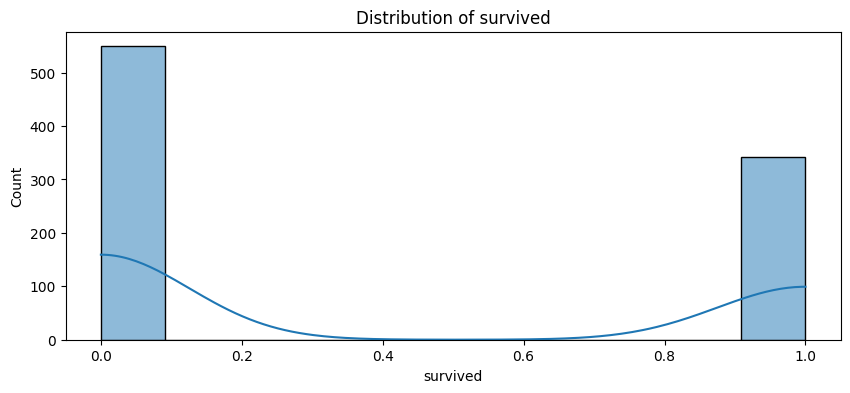

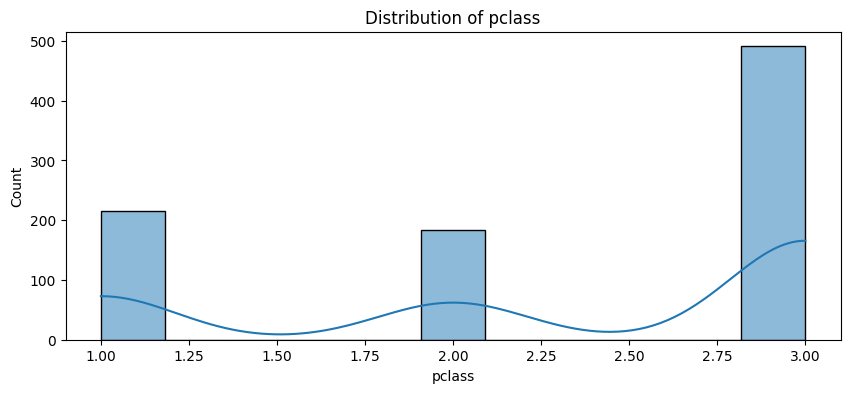

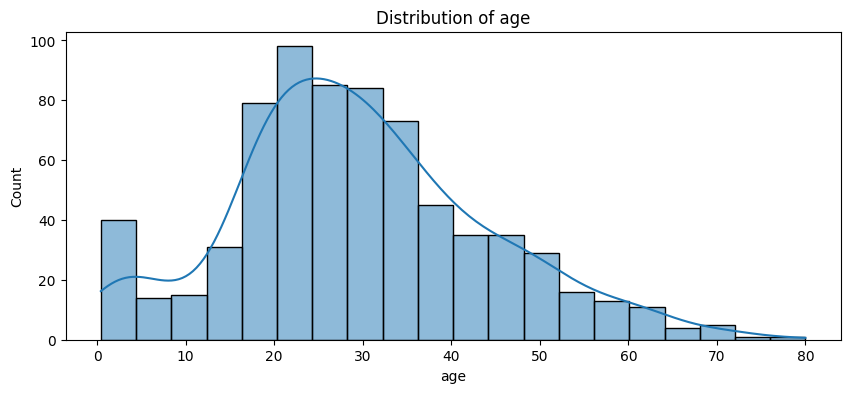

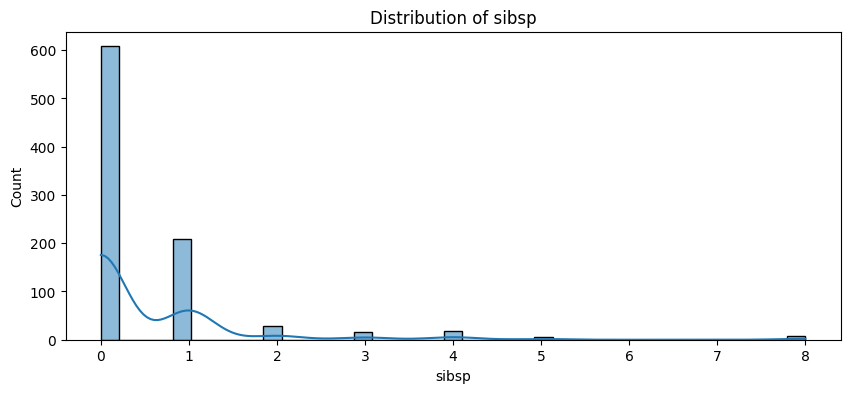

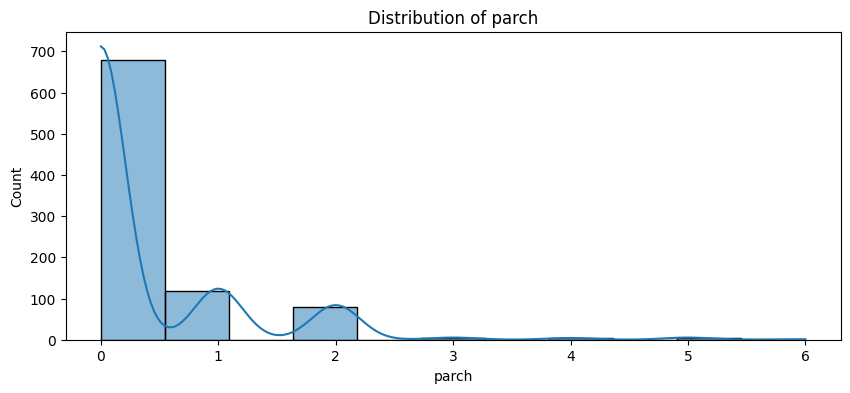

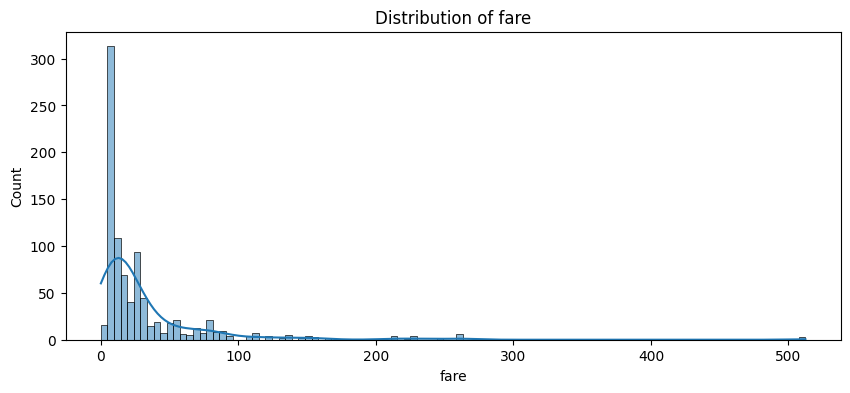

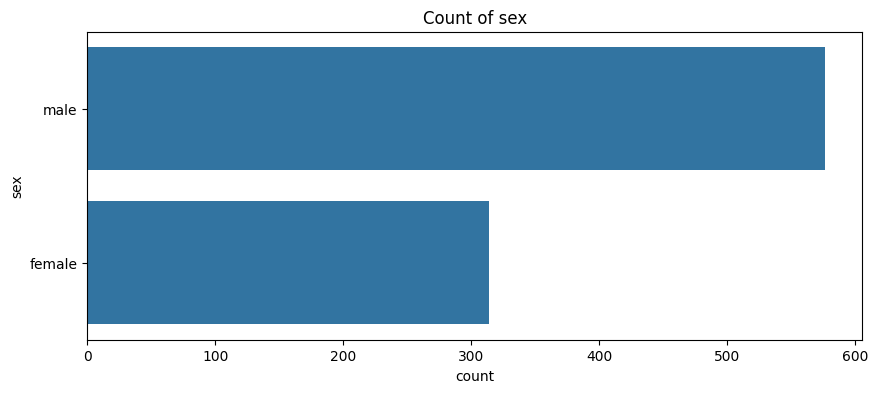

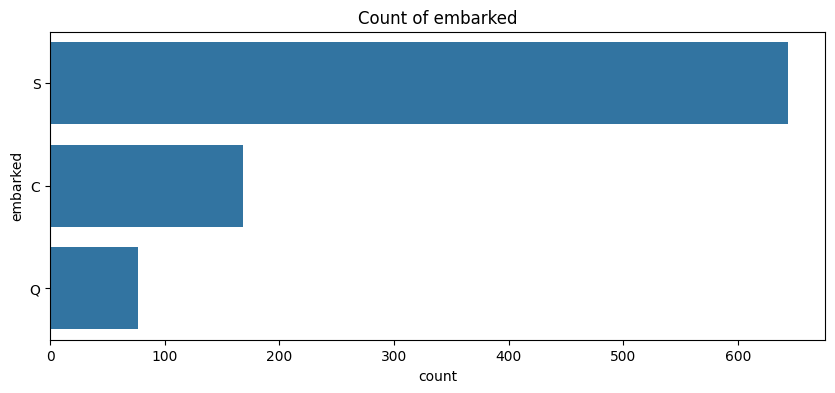

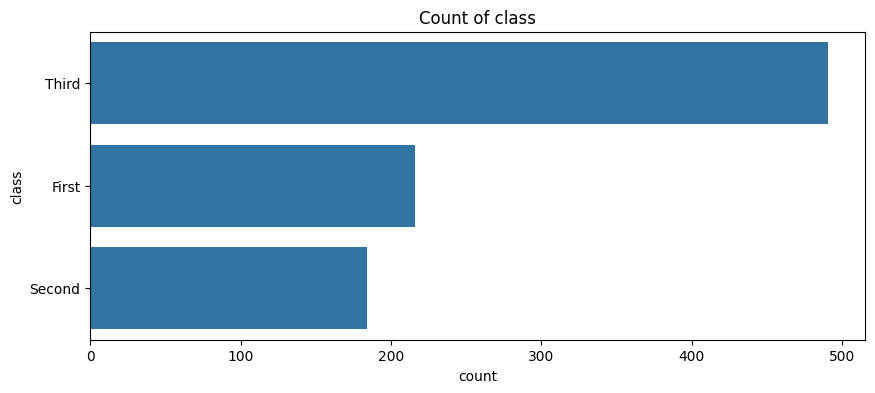

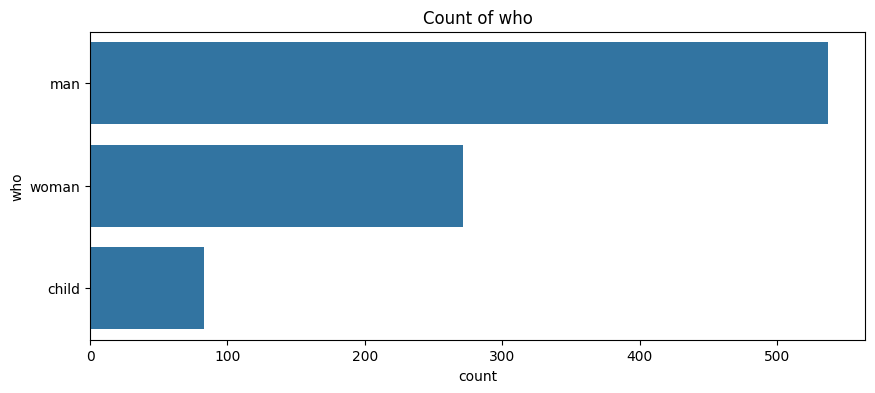

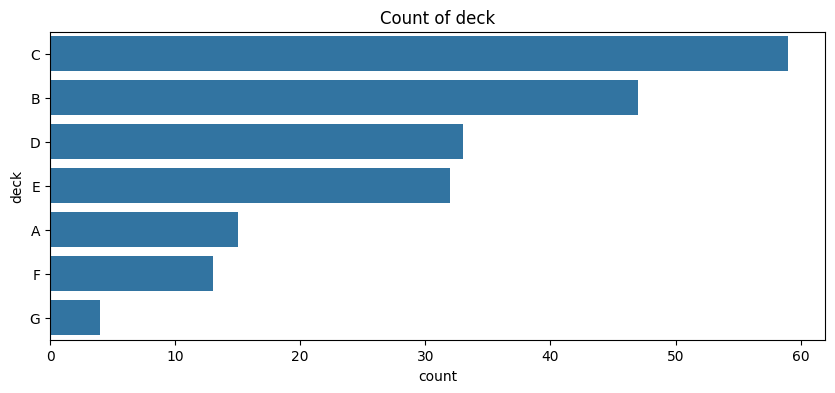

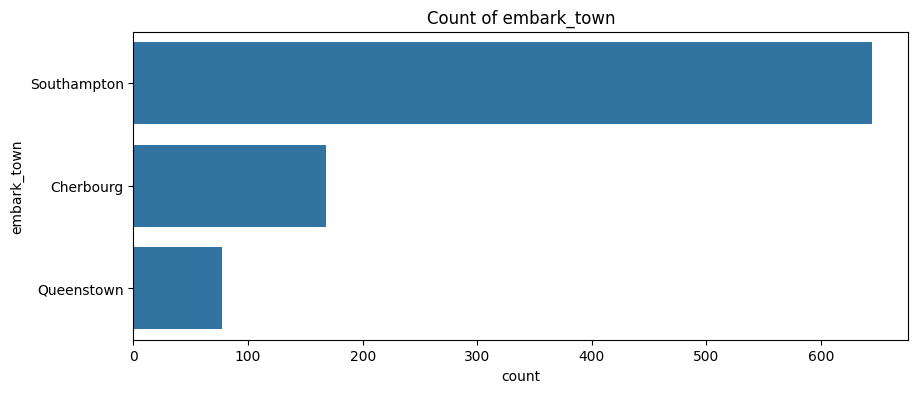

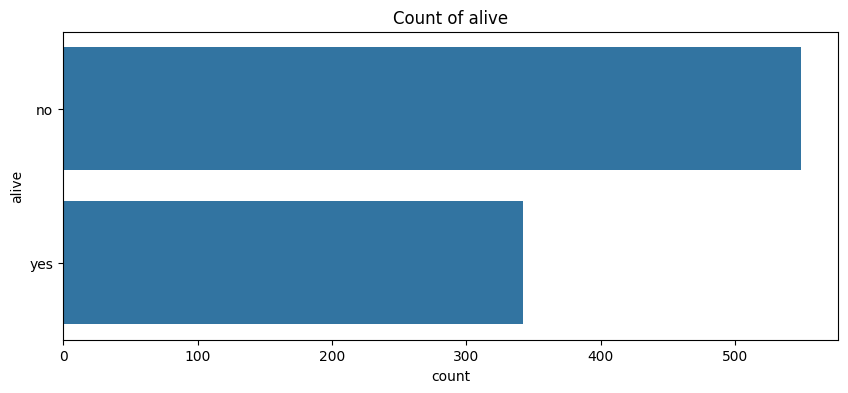

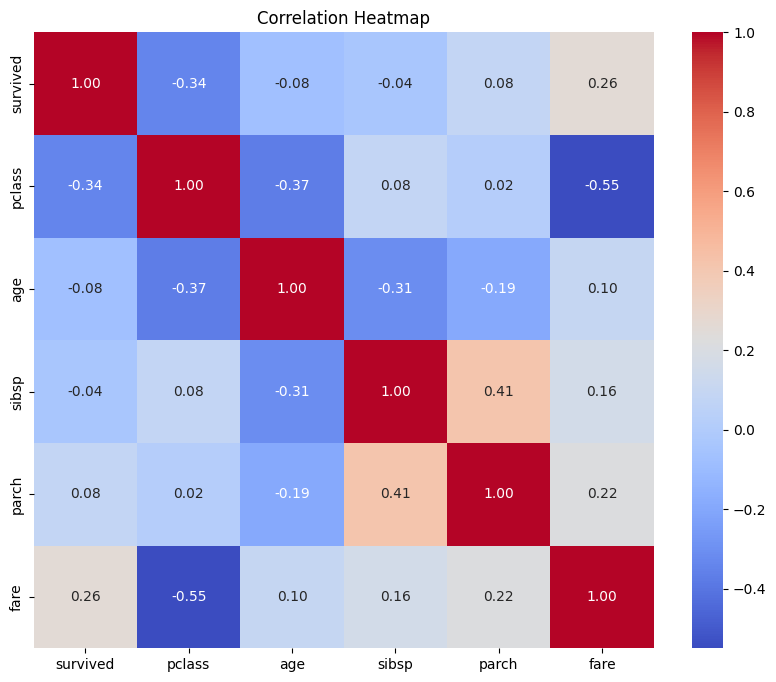

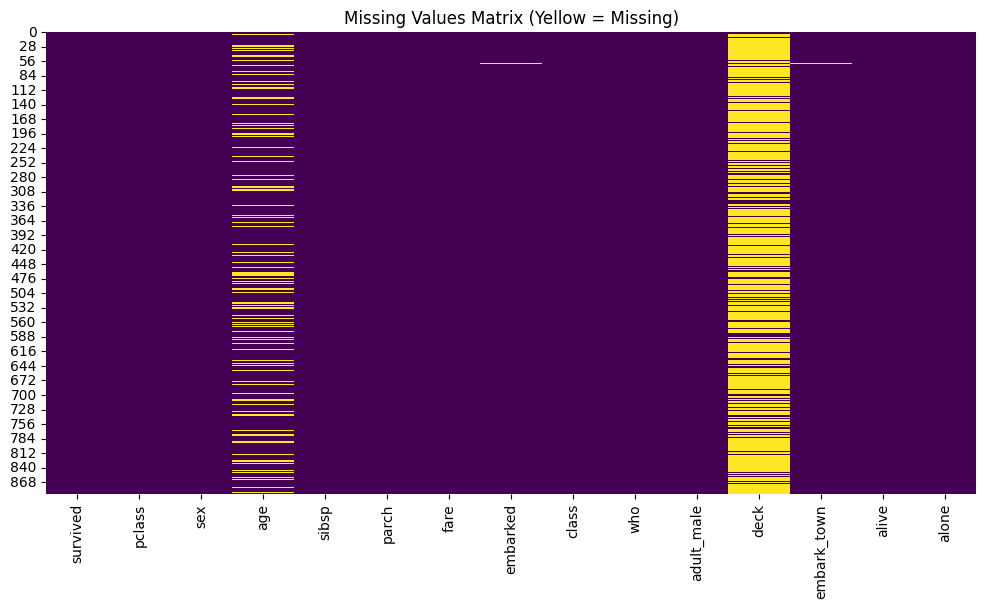

In [4]:
eda_overview(df)

plot_distributions(df)

correlation_heatmap(df)

missing_values_matrix(df)

## Key Learnings & Differences from Original

- Built declarative style (one function call for multiple insights).

- Challenges: Handling mixed dtypes gracefully, scaling to large data (original uses Dask).

- Extensions ideas: Add outlier detection, interactive Plotly versions, or auto-report generation.



References:

[1] Paper: "DataPrep.EDA: Task-Centric Exploratory Data Analysis for Statistical Modeling in Python" (SIGMOD 2021)
Authors: Jinglin Peng et al. https://doi.org/10.1145/3448016.3457330

[2] GitHub repo https://github.com/sfu-db/dataprep.